<a href="https://colab.research.google.com/github/Ann-Tonina/Amazon-Analysis/blob/master/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA MINING**

# **Install Required Libraries**

In [ ]:
pip install beautifulsoup4


In [ ]:
pip install requests

# **SCRAPING DATA WITH BEAUTIFULSOUP**
---



In [ ]:
# Importing libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [ ]:
base_url = "https://www.timeanddate.com/weather/kenya/{region}/historic?month={month}&year={year}"

In [ ]:
data = []

# Regions in Kenya including Mount Kenya areas
regions = [
    "nairobi", "mombasa", "kisumu", "eldoret",   # Major cities
    "nyeri", "nanyuki", "meru", "embu", "chuka"  # Mount Kenya region
]

for region in regions:
    for year in range(2015, 2025):  # last 10 years
        for month in range(1, 13):  # loop through months
            # Build URL
            url = base_url.format(region=region, month=month, year=year)
            response = requests.get(url)
            soup = BeautifulSoup(response.text, "html.parser")

            # Extract table rows
            table = soup.find("table", {"id": "wt-his"})
            if table:
                for row in table.find_all("tr"):
                    cols = [col.get_text(strip=True) for col in row.find_all("td")]
                    if cols:
                        data.append([region, year, month] + cols)

            time.sleep(2)  # be nice to server, avoid blocking


In [ ]:
# Letting pandas handle all columns automatically
df = pd.DataFrame(data)  # no column names, pandas assigns 0,1,2,...
print(df.head())

        0     1   2                                 3      4   \
0  nairobi  2015   1                                    77 °F   
1  nairobi  2015   1  Weather by CustomWeather, © 2025   None   
2  nairobi  2015   2                                    61 °F   
3  nairobi  2015   2                                    61 °F   
4  nairobi  2015   2                                    59 °F   

                 5        6     7     8          9     10  
0  Pleasantly warm.   12 mph     ↑   34%  30.12 "Hg   N/A  
1              None     None  None  None       None  None  
2            Clear.  No wind     ↑   83%  30.12 "Hg   N/A  
3            Clear.  No wind     ↑   77%  30.12 "Hg   N/A  
4            Clear.  No wind     ↑   82%  30.15 "Hg   N/A  


In [ ]:
# Checking the number of columns
print(len(df.columns))
print(df.head(1))  # show first row so you see all columns

11
        0     1   2  3      4                 5       6  7    8          9   \
0  nairobi  2015   1     77 °F  Pleasantly warm.  12 mph  ↑  34%  30.12 "Hg   

    10  
0  N/A  


In [ ]:
# Build DataFrame
df = pd.DataFrame(data)

In [ ]:
# Rename columns
df.columns = [
    "Region", "Year", "Month", "Date",
    "Max Temp", "Min Temp", "Condition",
    "Wind", "Humidity", "Pressure", "Visibility"
]


In [ ]:
# Preview
print(df.head())

    Region  Year  Month                              Date Max Temp  \
0  nairobi  2015      1                                      77 °F   
1  nairobi  2015      1  Weather by CustomWeather, © 2025     None   
2  nairobi  2015      2                                      61 °F   
3  nairobi  2015      2                                      61 °F   
4  nairobi  2015      2                                      59 °F   

           Min Temp Condition  Wind Humidity   Pressure Visibility  
0  Pleasantly warm.    12 mph     ↑      34%  30.12 "Hg        N/A  
1              None      None  None     None       None       None  
2            Clear.   No wind     ↑      83%  30.12 "Hg        N/A  
3            Clear.   No wind     ↑      77%  30.12 "Hg        N/A  
4            Clear.   No wind     ↑      82%  30.15 "Hg        N/A  


In [ ]:
# Save as CSV
df.to_csv("kenya_weather_data.csv", index=False, encoding="utf-8")
print("Dataset saved as kenya_weather_data.csv")

Dataset saved as kenya_weather_data.csv


In [ ]:
from google.colab import files

# Download it
files.download("kenya_weather_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#From the dataset downloaded above:

The reason you do not see the Mount Kenya regions (Nyeri, Meru, Nanyuki, Embu, Chuka) is likely due to one of the following reasons:

1. Timeanddate.com does not have weather pages for some smaller towns (e.g., Chuka, Embu).

2. If the page is missing, your scraper won’t find a table element and will silently skip it. That is why you do not see data for some towns.

# **WEATHER PREDICTION IN KENYAN REGIONS**
---


# Dataset Overview

The dataset contains historical weather data for selected regions in Kenya (2015–2024), including Nairobi, Mombasa, Kisumu and Eldoret. It includes daily values for maximum and minimum temperature, weather conditions, wind, humidity, and pressure, providing a solid foundation for predictive modeling.

#Problem Statement

Kenya’s diverse climate makes accurate weather forecasting challenging, yet essential for agriculture, energy planning and disaster preparedness.
Limited availability of structured regional weather data hinders the development of reliable prediction models.

#Objectives

To build a clean and structured dataset of historical weather across Kenyan regions(Nairobi, Mombasa, Kisumu and Eldoret).

To analyze weather patterns and regional climate variations.

To develop and evaluate machine learning models for accurate weather prediction.

#Methodology

Web scraping of historical weather data from TimeandDate.com using Python (Requests, BeautifulSoup).

Dataset stored in CSV for analysis and model training

Data cleaning: removing units, converting temperatures to numeric, handling missing values, and formatting dates.

Exploratory analysis to identify trends and seasonal variations.

Model development: applying machine learning techniques to predict future weather conditions based on historical patterns.

# **DATA UNDERSTANDING**

In [43]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
rng = np.random.default_rng(seed=42)

import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

# **Load and explore the dataset.**

In [44]:
# Loading the scarbed weather dataset
df = pd.read_csv("/content/drive/MyDrive/Weather_prediction/kenya_weather_data.csv")

In [45]:
#Inspecting the shape of the dataframe
df.shape

(4077, 11)

The dataset has 4077 rows (records) and 11 columns (features). This means you’ll be working with 4077 data points described by 11 variables.

In [46]:
#Checking the data size
print("Dataset information;")

df.info()

Dataset information;
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Region      4077 non-null   object
 1   Year        4077 non-null   int64 
 2   Month       4077 non-null   int64 
 3   Date        480 non-null    object
 4   Max Temp    3583 non-null   object
 5   Min Temp    3597 non-null   object
 6   Condition   3534 non-null   object
 7   Wind        3597 non-null   object
 8   Humidity    3580 non-null   object
 9   Pressure    2243 non-null   object
 10  Visibility  1825 non-null   object
dtypes: int64(2), object(9)
memory usage: 350.5+ KB


The dataset has 4077 records and 11 columns.

Columns include Region, Year, Month, Date, Max Temp, Min Temp, Condition, Wind, Humidity, Pressure, Visibility.

Most columns are object type (likely need conversion to numeric where applicable).

Some columns have missing values (e.g., Date, Pressure, Visibility,Max Temp,Min Temp, Condition, Wind and Humidity).

Data cleaning and type conversion will be necessary before analysis or model training.

In [47]:
#Checking for the missing values
df.isnull().sum()

,0
Region,0
Year,0
Month,0
Date,3597
Max Temp,494
Min Temp,480
Condition,543
Wind,480
Humidity,497
Pressure,1834


No missing values in: Region, Year, Month.

High missing values in: Date (3597), Pressure (1834), Visibility (2252) → need special handling (drop/replace).

Moderate missing values in: Max Temp (494), Min Temp (480), Condition (543), Wind (480), Humidity (497) → can be imputed.

In [48]:
#Displaying the first 10 rows of the dataset
df.head(10)

,Region,Year,Month,Date,Max Temp,Min Temp,Condition,Wind,Humidity,Pressure,Visibility
0,nairobi,2015,1,NaN,77 °F,Pleasantly warm.,12 mph,↑,34%,"30.12 ""Hg",NaN
1,nairobi,2015,1,"Weather by CustomWeather, © 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nairobi,2015,2,NaN,61 °F,Clear.,No wind,↑,83%,"30.12 ""Hg",NaN
3,nairobi,2015,2,NaN,61 °F,Clear.,No wind,↑,77%,"30.12 ""Hg",NaN
4,nairobi,2015,2,NaN,59 °F,Clear.,No wind,↑,82%,"30.15 ""Hg",NaN
5,nairobi,2015,2,NaN,59 °F,Sunny.,6 mph,↑,77%,"30.15 ""Hg",NaN
6,nairobi,2015,2,NaN,63 °F,Sunny.,No wind,↑,73%,"30.15 ""Hg",NaN
7,nairobi,2015,2,NaN,73 °F,Sunny.,6 mph,↑,50%,"30.18 ""Hg",NaN
8,nairobi,2015,2,NaN,NaN,Sunny.,12 mph,↑,NaN,NaN,NaN
9,nairobi,2015,2,NaN,81 °F,Passing clouds.,8 mph,↑,34%,"30.09 ""Hg",NaN


From inspecting the first ten rows above, we observe that;

Date column → Contains irrelevant text ("Weather by CustomWeather, © 2025") and mostly missing → needs cleaning.

Max Temp & Min Temp → Stored as strings with "°F" → must be converted to numeric (strip symbols, cast to float).

Condition → Textual weather descriptions (categorical) → can be encoded.

Wind → Stored as strings like "12 mph", "No wind", with arrows (↑) → requires cleaning and converting to numeric (e.g., speed in mph, direction separately).

Humidity → Percentages (e.g., "34%") → must strip % and convert to numeric.

Pressure → Values like "30.12 "Hg" → needs unit cleaning and conversion to numeric.

Visibility → Many missing values → decide whether to impute or drop.

Row 1 (index 1) → Looks like a footer/note row, not real data → should be dropped.

In [49]:
#Displaying the last 5 rows of the dataset
df.tail()

,Region,Year,Month,Date,Max Temp,Min Temp,Condition,Wind,Humidity,Pressure,Visibility
4072,eldoret,2024,12,NaN,70 °F,Partly sunny.,12 mph,↑,54%,NaN,19 mi
4073,eldoret,2024,12,NaN,70 °F,Partly sunny.,17 mph,↑,55%,NaN,19 mi
4074,eldoret,2024,12,NaN,66 °F,Overcast.,13 mph,↑,57%,NaN,19 mi
4075,eldoret,2024,12,NaN,59 °F,Passing clouds.,No wind,↑,78%,NaN,19 mi
4076,eldoret,2024,12,"Weather by CustomWeather, © 2025",NaN,NaN,NaN,NaN,NaN,NaN,NaN


From inspecting the last five rows above, we observe that the last few records in the dataset

Just like row 1 (head), row 4076 (tail) is a metadata/footer row ("Weather by CustomWeather, © 2025").

Date column is mostly empty and sometimes contains irrelevant strings.

Max Temp, Min Temp, Humidity, Wind, Pressure, Visibility → all have units/symbols (°F, %, mph, "Hg, mi) → must be cleaned and converted to numeric.

Condition → categorical text feature (Sunny, Overcast, etc.) → useful for weather prediction, should be encoded.

Wind column also has "No wind" and "↑" arrows → need parsing into speed (numeric) and maybe direction (categorical).

Pressure & Visibility → many missing values, but the tail rows show Visibility is sometimes filled, Pressure missing. Decide to drop or impute.

In [50]:
#Discriptive statistics
df.describe()

,Year,Month
count,4077.000000,4077.000000
mean,2019.837135,6.470689
std,2.840020,3.446128
min,2015.000000,1.000000
25%,2018.000000,3.000000
50%,2020.000000,6.000000
75%,2022.000000,10.000000
max,2024.000000,12.000000


Data covers 2015–2024 (10 years).

Average year ≈ 2020, evenly spread across the period.

Months range 1–12, with mean ≈ 6.5 → data fairly distributed across months.

In [51]:
#Finding the dublicates values
df.duplicated().sum()

np.int64(57)

In [52]:
#Identifying gabage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*5)

Region
nairobi    1981
eldoret     984
kisumu      595
mombasa     517
Name: count, dtype: int64
***************
Date
Weather by CustomWeather, © 2025    480
Name: count, dtype: int64
***************
Max Temp
62 °F     299
68 °F     261
64 °F     219
66 °F     211
58 °F     199
56 °F     196
72 °F     196
63 °F     195
75 °F     191
73 °F     189
77 °F     172
70 °F     169
79 °F     129
61 °F     122
81 °F     107
82 °F      75
59 °F      70
74 °F      49
76 °F      48
83 °F      47
80 °F      46
78 °F      40
85 °F      37
84 °F      35
71 °F      33
57 °F      33
69 °F      30
86 °F      29
67 °F      28
65 °F      23
87 °F      20
90 °F      18
55 °F      17
88 °F      17
89 °F      12
91 °F       5
60 °F       5
92 °F       4
54 °F       3
93 °F       2
-18 °F      1
53 °F       1
Name: count, dtype: int64
***************
Min Temp
Passing clouds.                     1205
Partly sunny.                        890
Overcast.                            543
Scattered clouds.            

📊 Breakdowns by Category

1. Region (Location)
This shows where the weather data was collected. Nairobi is the most frequent city in this dataset with 1,981 entries.Top City: Nairobi (1,981)Total Records: Approximately 4,077 across the four cities.

2. Max Temp (Maximum Temperature)
The dataset tracks how often specific temperatures were recorded as the "High."Most Common Temp: $62^{\circ}\text{F}$ (299 times).Outlier Alert: There is a value of $-18^{\circ}\text{F}$ appearing once. This is likely a data error (outlier) or a sensor malfunction, especially considering the other temperatures are tropical/temperate (mostly $60^{\circ}\text{F}$ to $90^{\circ}\text{F}$).

3. Min Temp (Weather Descriptions)
Interestingly, the column labeled "Min Temp" in your output actually contains weather conditions (text descriptions).Most Common State: "Passing clouds" (1,205).Precipitation: Several entries for "Light rain" and "Thundershowers" are visible.

4. Condition (Wind Speed);
Similar to the previous column, the names seem slightly shifted. "Condition" here is actually showing wind speeds.Stagnant Air: "No wind" is the most frequent state (1,062).High Wind: Most speeds are between 3–20 mph, but there is an extreme outlier of 112 mph, which would indicate a major storm or data error.

5. Other MetricsWind (Direction):
All 3,597 records show "↑", suggesting the wind direction was consistently recorded as North or the data only captured one direction.Humidity: The data is quite spread out, with 78% and 88% being the most frequent.Pressure: Measured in inches of mercury ("Hg). $30.15$ is the most frequent.Visibility: Most records show 19 miles of visibility (1,554 times).

🛠️ Summary ObservationsData Quality: There are some "dirty" data points (like the $-18^{\circ}\text{F}$ temp and the $112\text{ mph}$ wind) that you might want to filter out before doing any analysis.Column Mismatch: It looks like the headers in your original CSV/DataFrame might be shifted. For example, the text description ("Passing clouds") is under "Min Temp" and wind speeds are under "Condition."

# DATA CLEANING AND PREPROCESSING

## Typical Issues in the Dataset

1. Columns to Keep (Essential)

These columns have 100% data completion (4,077 non-null) and provide the core structure for your analysis.

Region: Essential for geographic analysis.

Year & Month: These provide your time-series foundation.

Note: Should combine these later into a single datetime object.

2. Columns to Drop (Redundant or Low Quality)

Date: Drop. It only has 480 non-null values (nearly 90% missing). Furthermore, the value_counts() showed it contains "Weather by CustomWeather" copyright text rather than actual dates.

Wind: Drop. Although it has 3,597 values, the value_counts() showed every single entry is the same symbol ("↑"). This provides zero variance and no useful information for a model or analysis.

3. Columns to Keep but Fix (The "Shifted" Columns)

Based on yourthe value_counts() output, the data columns are currently "misaligned"—meaning the header name does not match the data stored inside. Before performing any analysis, I must rename these to reflect reality:

Max Temp $\rightarrow$ Actual Temperature: This column correctly contains temperature values (e.g., $62^{\circ}\text{F}$), but it needs to be converted from a "string" (text) to a "numeric" (number) format by removing the °F symbol.

Min Temp $\rightarrow$ Weather Condition: Despite the name, this column contains text descriptions like "Passing clouds" and "Overcast." It should be renamed to Condition or Weather_Description.

Condition $\rightarrow$ Wind Speed: This column contains wind speeds (e.g., "12 mph"). It should be renamed to Wind_Speed and converted to numeric values.

4. Conditional Columns

Humidity: Keep. It has high completion (3,580 values). You will need to strip the "%" sign and convert it to an integer.

Pressure & Visibility: Keep with caution. These have high missing value rates (Pressure is ~45% missing, Visibility is ~55% missing).

Decision: If you are building a predictive model, these might be too sparse. If you are doing a general summary, keep them but be aware of the gaps.

In [53]:
#Rename columns to to lowercase
df = df.rename(columns={
    "Region": "region",
    "Year": "year",
    "Month": "month",
    "Date": "date",
    "Max Temp": "max_temp",
    "Min Temp": "min_temp",
    "Condition": "condition",
    "Wind": "wind",
    "Humidity": "humidity",
    "Pressure": "pressure",
    "Visibility": "visibility"
})


In [54]:
# Dropping unwanted columns

df = df.drop(columns=['date', 'wind', 'visibility', 'pressure'])

In [55]:
# Rename Mislabeled Columns

df = df.rename(columns={
    'max_temp': 'temp_f',
    'min_temp': 'weather_description',
    'condition': 'wind_speed_mph'
})

In [56]:
# Clean Numeric Strings and Convert Types

# Clean temperature (Remove °F)
df['temp_f'] = df['temp_f'].str.extract('([-+]?\d+)').astype(float)

# Clean wind speed (Remove mph)
df['wind_speed_mph'] = df['wind_speed_mph'].str.extract('(\d+)').astype(float)

# Clean humidity (Remove %)
df['humidity'] = df['humidity'].str.extract('(\d+)').astype(float)


In [57]:
# Create a Proper Datetime Index
df['day'] = 1
df['full_date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   region               4077 non-null   object        
 1   year                 4077 non-null   int64         
 2   month                4077 non-null   int64         
 3   temp_f               3583 non-null   float64       
 4   weather_description  3597 non-null   object        
 5   wind_speed_mph       2472 non-null   float64       
 6   humidity             3580 non-null   float64       
 7   day                  4077 non-null   int64         
 8   full_date            4077 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 286.8+ KB


In [60]:
df.head()

,region,year,month,temp_f,weather_description,wind_speed_mph,humidity,day,full_date
0,nairobi,2015,1,77.0,Pleasantly warm.,12.0,34.0,1,2015-01-01
1,nairobi,2015,1,NaN,NaN,NaN,NaN,1,2015-01-01
2,nairobi,2015,2,61.0,Clear.,NaN,83.0,1,2015-02-01
3,nairobi,2015,2,61.0,Clear.,NaN,77.0,1,2015-02-01
4,nairobi,2015,2,59.0,Clear.,NaN,82.0,1,2015-02-01


## Handling missing Values
Handling missing values in a weather dataset requires a careful approach. Simply dropping rows might lead to a loss of significant historical data, especially since wind_speed_mph is missing about 40% of its values.

The most effective method for weather data is Grouped Imputation, where you fill missing values based on the average weather for that specific Region and Month.

In [61]:
df.isnull().sum()

,0
region,0
year,0
month,0
temp_f,494
weather_description,480
wind_speed_mph,1605
humidity,497
day,0
full_date,0


In [62]:
# Handle Categorical Missing Values (weather_description)

# Fill with the most frequent weather condition
mode_val = df['weather_description'].mode()[0]
df['weather_description'] = df['weather_description'].fillna(mode_val)

Handle Numeric Missing Values (Grouped Imputation)

Weather is seasonal and regional. A missing temperature in Nairobi in July should be filled with the average temperature of Nairobi in July, not the average of the whole dataset.

In [63]:
# Fill numeric columns using the median of each Region and Month
cols_to_fix = ['temp_f', 'humidity', 'wind_speed_mph']

for col in cols_to_fix:
    df[col] = df.groupby(['region', 'month'])[col].transform(lambda x: x.fillna(x.median()))

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   region               4077 non-null   object        
 1   year                 4077 non-null   int64         
 2   month                4077 non-null   int64         
 3   temp_f               4077 non-null   float64       
 4   weather_description  4077 non-null   object        
 5   wind_speed_mph       4077 non-null   float64       
 6   humidity             4077 non-null   float64       
 7   day                  4077 non-null   int64         
 8   full_date            4077 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 286.8+ KB


In [65]:
df["year"].unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [66]:
df["temp_f"].unique()

array([ 77. ,  72. ,  61. ,  59. ,  63. ,  73. ,  81. ,  82. ,  84. ,
        79. ,  70. ,  68. ,  64. ,  66. ,  75. ,  55. ,  57. ,  88. ,
        86. ,  54. ,  80. ,  87. ,  78. ,  83. ,  90. ,  85. ,  89. ,
        76. ,  74. ,  71. ,  79.5,  91. ,  56. ,  92. ,  93. ,  67. ,
        69. ,  73.5,  58. ,  65. ,  62. , -18. ,  60. ,  53. ])

In [67]:
df["wind_speed_mph"].unique()

array([ 12. ,   6. ,   8. ,  14. ,   9. ,  21. ,  20. ,  15. ,  10. ,
        17. ,   3. ,   7. ,   5. ,  13. ,  18. ,  16. ,  23. ,  22. ,
        24. ,  31. ,  29. ,  25. ,   8.5,   7.5,   2. , 112. ,  88. ,
        11. ])

In [68]:
df["humidity"].unique()

array([ 34. ,  57. ,  83. ,  77. ,  82. ,  73. ,  50. ,  54. ,  28. ,
        23. ,  42. ,  61. ,  64. ,  52. ,  56. ,  55. ,  94. ,  88. ,
        78. ,  65. ,  66.5, 100. ,  68. ,  53. ,  60. ,  44. ,  69. ,
        39. ,  37. ,  35. ,  29. ,  27. ,  32. ,  47. ,  41. ,  51. ,
        45. ,  48. ,  36. ,  30. ,  25. ,  46. ,  38. ,  49. ,  21. ,
        24. ,  33. ,  72. ,  17. ,  26. ,  31. ,  58. ,  59. ,  67. ,
        40. ,  74. ,  19. ,  15. ,  75. ,  70. ,  81. ,  84. ,  93. ,
        90. ,  80. ,  87. ,  92. ,  71. ,  66. ,  78.5,  97. ,  96. ,
        98. ,  86. ,  89. ,  91. ,  95. ,  76. ,  85. ,  79. ,  62. ,
        63. ,  67.5,  70.5,  43. ,  99. ])

# **EXPLORATORY DATA ANALYSIS (EDA)**

We will focus on identifying statistical anomalies and understanding how weather variables interact with each other across different regions.

## **Handling Outliers**

In [69]:
# Define the columns you want to check for outliers
numeric_cols = ['temp_f', 'wind_speed_mph', 'humidity']

# Calculate IQR for each column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Print number of outliers
print("Number of outliers detected:")
print(outliers.sum())

Number of outliers detected:
81


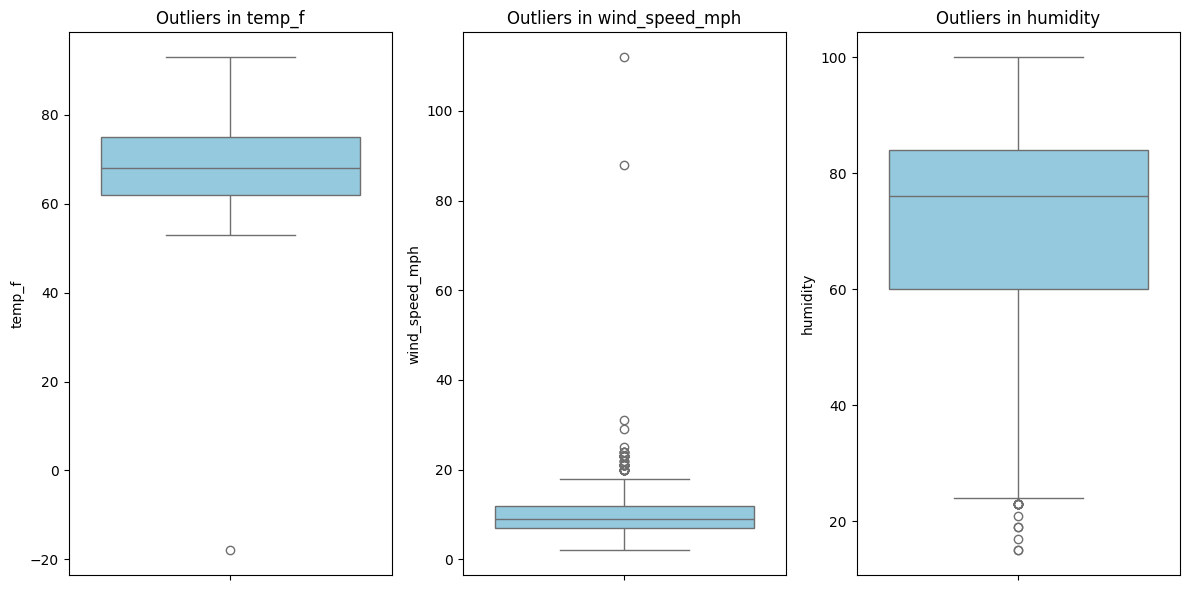

In [70]:

# Visualize Outliers with Boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

## **Removing Outliers**

In [71]:
def handle_outliers(df, columns, method='iqr', threshold=1.5):
    df_cleaned = df.copy()


    for column in columns:
        if method == 'iqr':
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)

        elif method == 'percentile':
            lower_bound = df[column].quantile(0.01)
            upper_bound = df[column].quantile(0.99)
            df_cleaned[column] = df_cleaned[column].clip(lower_bound, upper_bound)

    return df_cleaned

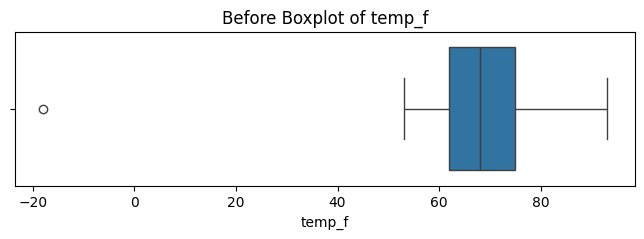

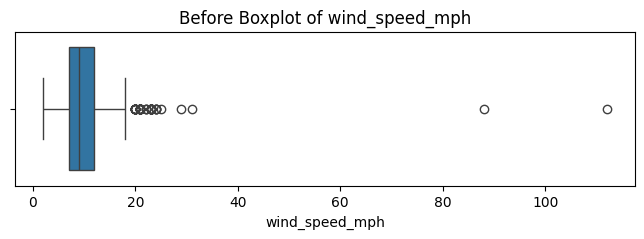

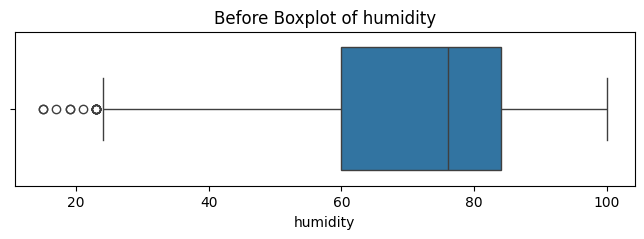

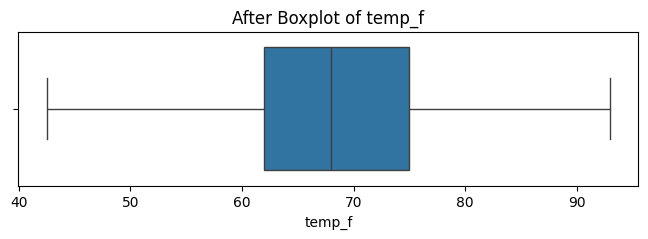

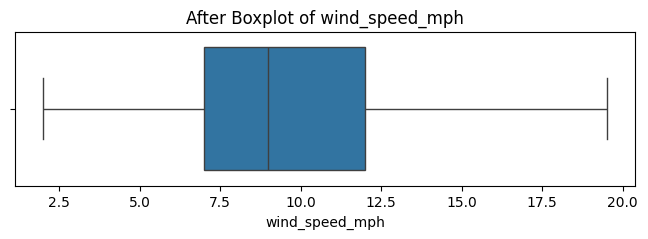

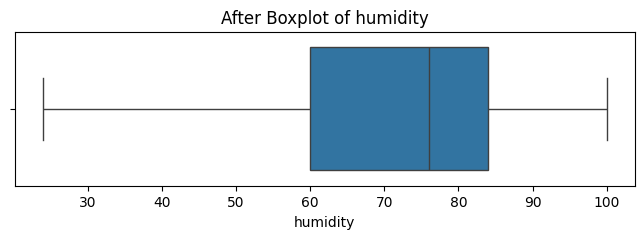

In [75]:
# Original columns with potential outliers
columns_to_check = ['temp_f', 'wind_speed_mph', 'humidity']

# Visualize BEFORE outlier handling
def visualize_outliers(df, columns, title_prefix=''):
    for col in columns:
        plt.figure(figsize=(8, 2))
        sns.boxplot(x=df[col])
        plt.title(f'{title_prefix} Boxplot of {col}')
        plt.xlabel(col)
        plt.show()

# Before cleaning
visualize_outliers(df, columns_to_check, title_prefix='Before')

# Apply outlier handling
df_cleaned = handle_outliers(df, columns_to_check, method='iqr', threshold=1.5)

# After cleaning
visualize_outliers(df_cleaned, columns_to_check, title_prefix='After')

## Correlation Heatmap
This tells us if one variable (like Humidity) tends to go up when another (like Temp) goes down.

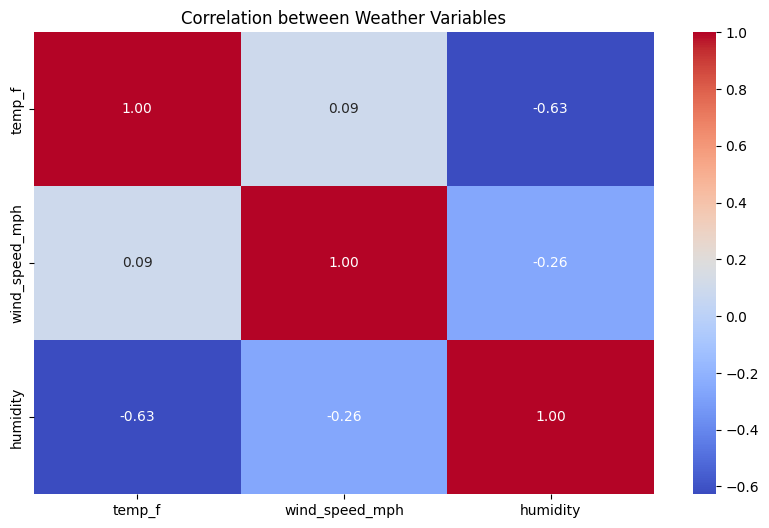

In [76]:
plt.figure(figsize=(10, 6))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Weather Variables')
plt.show()

## Temperature vs. Humidity (Scatter Plot)

We can color the points by Region to see if different cities have distinct "weather signatures."

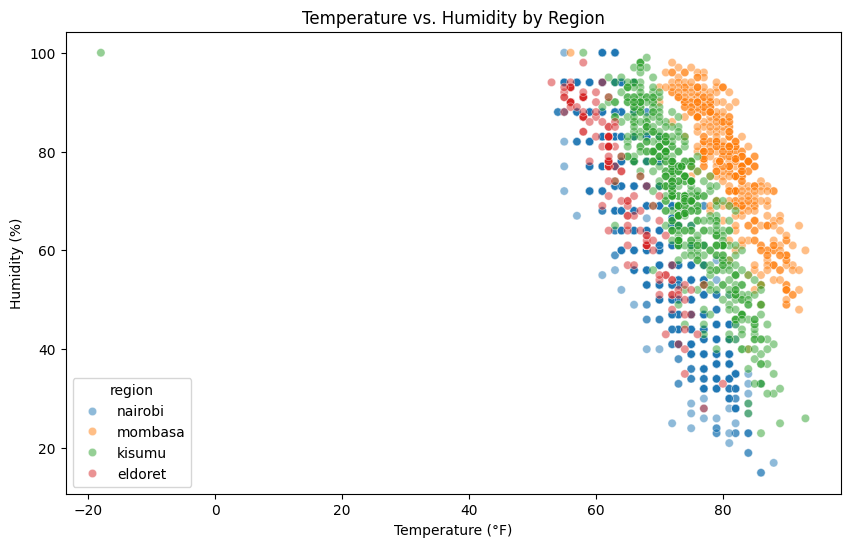

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp_f', y='humidity', hue='region', alpha=0.5)
plt.title('Temperature vs. Humidity by Region')
plt.xlabel('Temperature (°F)')
plt.ylabel('Humidity (%)')
plt.show()

## Time Series Trends
Since you have a full_date column, we can see how temperatures change over the years.

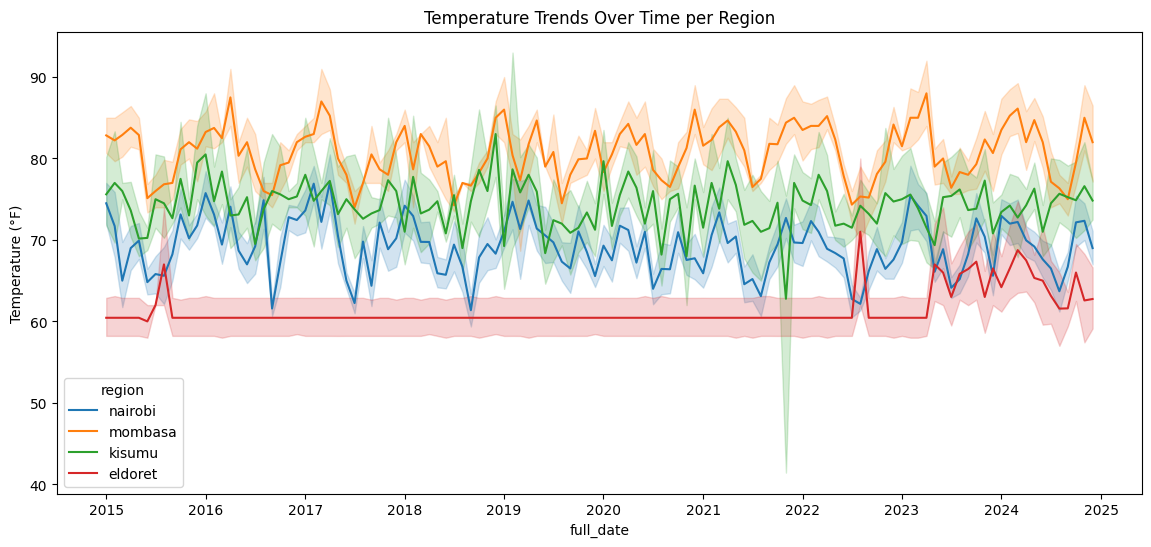

In [78]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='full_date', y='temp_f', hue='region')
plt.title('Temperature Trends Over Time per Region')
plt.ylabel('Temperature (°F)')
plt.show()

## **Normalization using standard scaler**

In [79]:
def normalize_data(df, columns, method='log'):
    df_normalized = df_cleaned()

    for column in columns:
        if method == 'log':
            # Add a small constant to avoid log(0)
            df_normalized[f'{column}_normalized'] = np.log1p(df_normalized[column])
        elif method == 'standard':
            scaler = StandardScaler()
            df_normalized[f'{column}_normalized'] = scaler.fit_transform(df_normalized[[column]])

    return df_normalized

# **FEATURE ENGINEERING**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Copy the dataframe
df_scaled = df.copy()

# Select numeric columns only
numeric_cols = df_scaled.select_dtypes(include=["int64", "float64"]).columns

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print("Numeric columns normalized using StandardScaler:")
print(df_scaled.head())


Numeric columns normalized using StandardScaler:
       region      year     month  max_temp  min_temp condition   wind  \
0     nairobi -1.703413 -1.587684  0.990070       NaN    12 mph  North   
3100  eldoret -1.703413 -1.587684 -0.884360       NaN   No wind  North   
3099  eldoret -1.703413 -1.587684 -1.384208       NaN   No wind  North   
3098  eldoret -1.703413 -1.587684 -1.634132       NaN   No wind  North   
3097  eldoret -1.703413 -1.587684 -1.634132       NaN   No wind  North   

      humidity       date  
0    -2.251474 2015-01-01  
3100  0.548098 2015-01-01  
3099  1.143751 2015-01-01  
3098  1.262882 2015-01-01  
3097  1.084186 2015-01-01  


In [ ]:
df["date"] = pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")
df["season"] = df["month"] % 12 // 3 + 1   # 1=Winter, 2=Spring, 3=Summer, 4=Fall
df["is_rainy_season"] = df["month"].isin([3,4,5,10,11])  # adjust for your region

In [ ]:
df["temp_range"] = df["max_temp"] - df["min_temp"]

In [ ]:
df["avg_temp"] = (df["max_temp"] + df["min_temp"]) / 2


In [ ]:
df["humid_temp_index"] = df["humidity"] * df["avg_temp"]

In [ ]:
df["heat_index"] = df["avg_temp"] + 0.1 * df["humidity"]

In [ ]:
df = df.sort_values(by=["region","date"])
df["temp_lag1"] = df.groupby("region")["avg_temp"].shift(1)
df["humidity_rolling3"] = df.groupby("region")["humidity"].rolling(3).mean().reset_index(level=0, drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4077 entries, 3100 to 1980
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   region             4077 non-null   object        
 1   year               4077 non-null   int64         
 2   month              4077 non-null   int64         
 3   max_temp           4077 non-null   float64       
 4   min_temp           0 non-null      float64       
 5   humidity           4077 non-null   float64       
 6   date               4077 non-null   datetime64[ns]
 7   season             4077 non-null   int64         
 8   is_rainy_season    4077 non-null   bool          
 9   temp_range         0 non-null      float64       
 10  avg_temp           0 non-null      float64       
 11  condition_112 mph  4077 non-null   bool          
 12  condition_12 mph   4077 non-null   bool          
 13  condition_13 mph   4077 non-null   bool          
 14  condition_

In [ ]:
df.columns

Index(['region', 'year', 'month', 'max_temp', 'min_temp', 'humidity', 'date',
       'season', 'is_rainy_season', 'temp_range', 'avg_temp',
       'condition_112 mph', 'condition_12 mph', 'condition_13 mph',
       'condition_14 mph', 'condition_15 mph', 'condition_16 mph',
       'condition_17 mph', 'condition_18 mph', 'condition_2 mph',
       'condition_20 mph', 'condition_21 mph', 'condition_22 mph',
       'condition_23 mph', 'condition_24 mph', 'condition_25 mph',
       'condition_29 mph', 'condition_3 mph', 'condition_31 mph',
       'condition_5 mph', 'condition_6 mph', 'condition_7 mph',
       'condition_8 mph', 'condition_88 mph', 'condition_9 mph',
       'condition_No wind', 'humid_temp_index', 'heat_index', 'temp_lag1',
       'humidity_rolling3'],
      dtype='object')

In [ ]:
df.head()

,region,year,month,max_temp,min_temp,humidity,date,season,is_rainy_season,temp_range,...,condition_6 mph,condition_7 mph,condition_8 mph,condition_88 mph,condition_9 mph,condition_No wind,humid_temp_index,heat_index,temp_lag1,humidity_rolling3
3100,eldoret,2015,1,62.0,NaN,81.0,2015-01-01,1,False,NaN,...,False,False,False,False,False,True,NaN,NaN,NaN,NaN
3099,eldoret,2015,1,58.0,NaN,91.0,2015-01-01,1,False,NaN,...,False,False,False,False,False,True,NaN,NaN,NaN,NaN
3098,eldoret,2015,1,56.0,NaN,93.0,2015-01-01,1,False,NaN,...,False,False,False,False,False,True,NaN,NaN,NaN,88.333333
3097,eldoret,2015,1,56.0,NaN,90.0,2015-01-01,1,False,NaN,...,False,False,False,False,False,True,NaN,NaN,NaN,91.333333
3096,eldoret,2015,1,62.0,NaN,78.0,2015-01-01,1,False,NaN,...,False,False,True,False,False,False,NaN,NaN,NaN,87.000000


# **FEATURE SELECTION**

# **MODELING**